<a href="https://colab.research.google.com/github/YunMai-SPS/Tensorflow_MNIST/blob/main/build_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3 

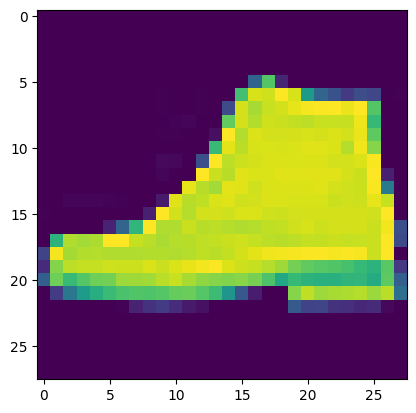

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 42

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 7ms/step - loss: 0.5016 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3754 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3369 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3117 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2940 - accuracy: 0.8916


In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3551 - accuracy: 0.8747


[0.3550559878349304, 0.8747000098228455]

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 4ms/step
[7.6936794e-06 7.1035204e-09 6.7965323e-07 2.0755324e-06 3.3089083e-07 8.1016561e-03 7.7742516e-06 3.9223630e-02 8.9897385e-06 9.5264715e-01]


In [ ]:
np.argmax(classifications[0])

9

In [ ]:
print(test_labels[0])

9


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2802 - accuracy: 0.8961
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2661 - accuracy: 0.9016
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2546 - accuracy: 0.9052
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2477 - accuracy: 0.9086
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2391 - accuracy: 0.9109


In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4774 - accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3576 - accuracy: 0.8686
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3235 - accuracy: 0.8808
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2989 - accuracy: 0.8896
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[2.1714786e-09 1.0650190e-09 2.5380644e-11 3.2120202e-11 4.7343024e-10 2.5906166e-04 5.1751653e-10 8.9059966e-03 2.5122611e-09 9.9083483e-01]
9


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3360 - accuracy: 0.8806


[0.3359595835208893, 0.8805999755859375]

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(), #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4791 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3611 - accuracy: 0.8664
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3273 - accuracy: 0.8790
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3083 - accuracy: 0.8840
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[4.1534710e-07 2.2249312e-06 3.4399562e-08 1.9503832e-09 7.8872453e-08 2.4600010e-03 8.0011439e-08 1.7210983e-02 7.8650423e-08 9.8032594e-01]
9


In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=15) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5030 - accuracy: 0.8230
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3785 - accuracy: 0.8646
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3381 - accuracy: 0.8782
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3123 - accuracy: 0.8843
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2989 - accuracy: 0.8914
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2830 - accuracy: 0.8965
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2722 - accuracy: 0.8997
Epoch 8/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2595 - accuracy: 0.9027
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2490 - accuracy: 0.9076
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2

[0.34282800555229187, 0.8860999941825867]

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=30) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5003 - accuracy: 0.8241
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3748 - accuracy: 0.8643
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3335 - accuracy: 0.8791
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3134 - accuracy: 0.8849
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2955 - accuracy: 0.8914
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2811 - accuracy: 0.8957
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2668 - accuracy: 0.8993
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2556 - accuracy: 0.9053
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2472 - accuracy: 0.9072
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.237

[0.4000624120235443, 0.8921999931335449]

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 4.3020 - accuracy: 0.7598
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5467 - accuracy: 0.8173
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5132 - accuracy: 0.8284
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4971 - accuracy: 0.8338
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[3.26743771e-10 6.20388505e-08 2.94730399e-14 9.34511917e-08 1.05729556e-17 4.95447852e-02 1.25828245e-11 1.30341679e-01 3.08989655e-07 8.20113122e-01]
9


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.4733 - accuracy: 0.8323
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4728 - accuracy: 0.8324


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.4747 - accuracy: 0.8303
Epoch 2/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.3583 - accuracy: 0.8683
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3584 - accuracy: 0.8683
